# Brain Networks in Python

The WhitakerLab's Brain Networks in Python repository is a tool to perform network analysis on covariance in cortical thickness

### Setting Up

   This code prefers Python3 although (I think) it will still run in 2. 
   
   You will need to clone the BrainNetworksinPython repository

You will need the following Python modules installed

* [numpy](https://pypi.python.org/pypi/numpy/1.13.0rc1)
* [pandas](https://pypi.python.org/pypi/pandas/0.20.1)
* [matplotlib](https://matplotlib.org/users/installing.html)
* [community/python-louvain](https://pypi.python.org/pypi/python-louvain/0.6) (pip install python-louvain if you use pip)
* [networkx](https://pypi.python.org/pypi/networkx/1.11)
* [seaborn](https://pypi.python.org/pypi/seaborn/)
* From the Python Standard Library
    * pickle
    * os
    * sys
    * \_\_future\_\_
    * argparse
    * textwrap
    
I'm going to add the wrappers, scripts and example_data directories to the search path. The wrappers and scripts folders contain all of our python code. 
The 'example_data' directory contains the example data from the github repository. If you have data of your own that you want to use, go ahead and direct the search path to it.

In [1]:
import sys
import os

# We add our wrappers, scripts and example_data folders to the searchpath
sys.path.append('../')
import BrainNetworksInPython as bnip                         

### Running corrmat_from_regionalmeasures


The corrmat_from_regionalmeasures wrapper is going to read in our cortical thickness data to create the correlation matrix and write it to the output directory as a .txt file.

The function we're going to use requires three files:

* A csv file documenting cortical thickness per region for each participant.
* the names of our brain regions
* the cartesian coordinates of each brain region


We can also indicate covariates, but let's save that for a later time

In [2]:
import BrainNetworksInPython.datasets.NSPN_WhitakerVertes_PNAS2016.data as data

# We define our file locations. If you are using your own data these are the locations that you will want to change
centroids_file, regionalmeasures_file, names_file, covars_file, names_308_style = bnip.datasets.NSPN_WhitakerVertes_PNAS2016.data._get_data()

# We choose where to output our corrmat file
corrmat_file = os.getcwd()+'/corrmat_file.txt'   

import BrainNetworksInPython.wrappers.corrmat_from_regionalmeasures as cfrm
cfrm.corrmat_from_regionalmeasures(regionalmeasures_file, names_file, corrmat_file, names_308_style=True)

../BrainNetworksInPython/wrappers/../scripts/stats_functions.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(A, y)[0]
../BrainNetworksInPython/wrappers/../scripts/stats_functions.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(A, y)[0]


The correlation matrix can be found now in our working directory saved as corrmat_file.txt.

If you'd like to see a more agreeable visual representation of the matrix, the next cell will generate a heatmap (saved as a png in you current working directory)

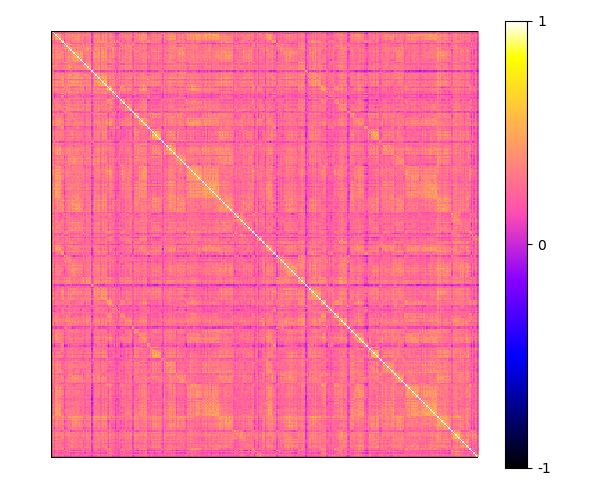

In [3]:
import visualisation_commands as vc
corrmat_picture=os.getcwd()+'/corrmat_picture'
vc.view_corr_mat(corrmat_file, corrmat_picture, cmap_name='gnuplot2')
from IPython.display import Image
Image("corrmat_picture.png")

If you don't like pink, please take a look at matplotlib's [colormap documentation](https://matplotlib.org/examples/color/colormaps_reference.html) and change the cmap_name= argument

### Running network_analysis_from_corrmat

Our second wrapper will turn our matrix into a network (at cost) and calculate a bunch of network measures. We will write these out as csv files.


In [ ]:
# Once again, this is going to write some files, so we give it a location
network_analysis = os.getcwd()+'/network_analysis'
# This is going to take a couple of minutes
import BrainNetworksInPython.wrappers.network_analysis_from_corrmat as nafc
network_analysis = os.getcwd()+'/network_analysis'
nafc.network_analysis_from_corrmat(corrmat_file,
                                  names_file,
                                  centroids_file,
                                  network_analysis,
                                  cost=10,
                                  n_rand=100,
                                  names_308_style=True)

        Calculating participation coefficient - may take a little while
        Creating 100 random graphs - may take a little while


### Visualising the data


We have subjected our computers to a lot of work without getting any cool brain pictures. We address that here

Please ignore the statsmodels error message. This appears to be an issue with the seaborn module

In [ ]:
# We will be using the files we just used network_analysis_from _corrmat to create
NodalMeasures=network_analysis+'/NodalMeasures_corrmat_file_COST010.csv'
GlobalMeasures=network_analysis+'/GlobalMeasures_corrmat_file_COST010.csv'
RichClub=network_analysis+'/RICH_CLUB_corrmat_file_COST010.csv'
# We're going to save them in a folder called figures
figures_dir=os.getcwd()+'/figures'

import make_figures as mfg
mfg.network_summary_fig(corrmat_file, NodalMeasures, GlobalMeasures, RichClub, figures_dir)
Image("figures/NetworkSummary_LowRes.png")